<a href="https://colab.research.google.com/github/Rogerio-mack/ProjetoAplicadoIV/blob/main/Projeto_aplicado_IV_entrega_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  <img src="https://github.com/Rogerio-mack/GCF/raw/main/GCF_files/Mackenzie.jpg" width="25%" align="right"/>

  # **PROJETO APLICADO IV - Entrega 2**
  
  <br>
  <br>
  


# **Modelo para previsão de taxa de desemprego no Distrito Federal através de séries temporais**
---

In [ ]:
#@title **Identificação do Grupo e Opção do Projeto**

#@markdown Integrantes do Grupo, nome completo em ordem alfabética (*informe: \<nome\>, \<matrícula\>*)
Aluno1 = 'Isabelli Baptista Villada, 10369606' #@param {type:"string"}
Aluno2 = 'Julia Caroline Ribeiro, 10370146' #@param {type:"string"}
Aluno3 = 'Lorena Lorrane Fraga dos Santos, 10368981' #@param {type:"string"}

# **Resumo**


O projeto do grupo Zeta visa realizar previsões mensais da taxa de desemprego no Distrito Federal para o ano de 2024 através de uma base de dados disponibilizada pela PED (Pesquisa de Emprego e Desemprego) no site do DIEESE, utilizaremos informações de 2018 a 2023. Sabemos que o desemprego é um problema constante e atual no Brasil, o seu crescimento afeta diretamente a economia e consequentemente a qualidade de vida da população, por isso, o objetivo com o desenvolvimento deste trabalho é compreender e antecipar as tendências econômicas locais, possibilitando com que políticas públicas sejam implementadas para geração de empregos. Neste trabalho, também analisaremos como a inclusão de outras variáveis no modelo constuído afetam as previsões geradas e qual o impacto dessa adição para os resultados obtidos. A metodologia adotada inclui técnicas de análise de séries temporais e algoritmos de autoregressão como o modelo SARIMAX que leva em consideração o fator de sazonalidade. Dessa forma, almejamos prever valores utilizando os principais indicadores do mercado de trabalho regional.

# **Fonte dos Dados**


Os dados utilizados neste trabalho são públicos e foram obtidos através do portal do DIEESE pelo link: https://www.dieese.org.br/analiseped/microdadosBSB.html e do Portal de Dados Abertos do Banco Central do Brasil no link: https://dadosabertos.bcb.gov.br/dataset/4189-taxa-de-juros---selic-acumulada-no-mes-anualizada-base-252. Os dados no DIEESE são da região do Distrito Federal e provenientes da base de micro-dados da Pesquisa de Emprego e Desemprego, que envolve pesquisas domiciliares para acompanhamento do mercado de trabalho regional, e apresentam as definições de condição de atividade, de domicílio, de família e morador e dos principais indicadores do mercado de trabalho, além dos períodos de referência
adotados pela pesquisa. Os dados no segundo link são séries temporais mensais dos valores da taxa da Selic.




# **Introdução**

O objetivo central deste trabalho é realizar previsões mensais da taxa de desemprego para 2024. O Distrito Federal foi a região escolhida para as análises juntamente com uma base de dados específica disponibilizada pela Pesquisa de Emprego e Desemprego (PED) através do site do Departamento Intersindical de Estatística e Estudos Socioeconômicos (DIEESE). A PED é uma pesquisa que abrange dados domiciliares e é reconhecida por sua abrangência e detalhamento na análise do mercado de trabalho regional.

No contexto brasileiro, o desemprego é um desafio constante e impactante. O aumento do desemprego não apenas afeta diretamente os indivíduos desempregados, mas também tem implicações significativas na economia como um todo, afetando a renda das famílias, o consumo, os investimentos e a estabilidade social. Portanto, compreender e antecipar as tendências relacionadas ao desemprego é fundamental para a formulação de políticas públicas eficazes que visem mitigar os impactos negativos e promover a geração de empregos, a fim de manter a estabilidade econômica e diminuir os riscos de regressão.

O método adotado neste projeto envolve a utilização de técnicas avançadas de análise de séries temporais e algoritmos de autoregressão, destacando-se o modelo SARIMAX. Esse modelo leva em consideração o fator de sazonalidade, o que é especialmente relevante ao analisar dados mensais, pois muitas vezes há padrões sazonais que influenciam a taxa de desemprego ao longo do ano.
Além da previsão da taxa de desemprego, este trabalho também se propõe a analisar como a inclusão de outras variáveis no modelo impacta as previsões geradas. Essas variáveis podem incluir dados econômicos, sociais e demográficos relevantes que possam influenciar o mercado de trabalho. Essa criticidade na análise é crucial para entender melhor as dinâmicas complexas que envolvem o desemprego e para melhorar a precisão das previsões.

Os dados utilizados são de fontes confiáveis e acessíveis ao público, obtidos diretamente do portal do DIEESE e do Portal de Dados Abertos do Banco Central do Brasil. Essas fontes fornecem uma base sólida e detalhada para a análise do mercado de trabalho na região do Distrito Federal, incluindo informações sobre condição de atividade, domicílio, família, morador e outros indicadores essenciais para compreender as nuances do desemprego e suas causas subjacentes.


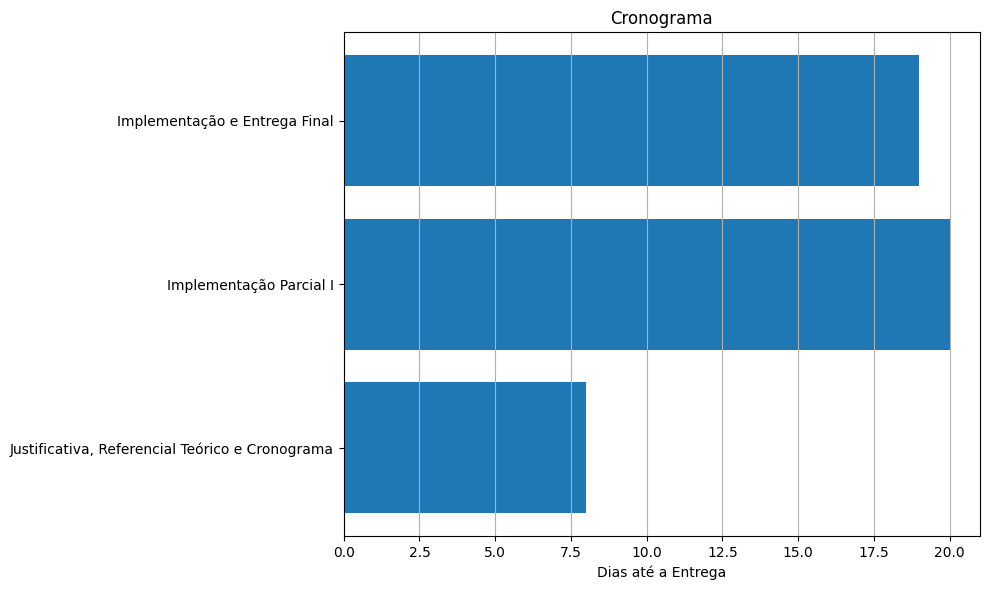

In [ ]:
#@title Cronograma para as próximas etapas do projeto

import matplotlib.pyplot as plt
import pandas as pd

# Dados do cronograma
atividades = ['Justificativa, Referencial Teórico e Cronograma', 'Implementação Parcial I', 'Implementação e Entrega Final']
inicio = ['2024-03-30', '2024-04-15', '2024-05-10']
fim = ['2024-04-07','2024-05-05','2024-05-29']

# Criar um DataFrame com os dados
dados = {'Atividades': atividades, 'Início': pd.to_datetime(inicio), 'Fim': pd.to_datetime(fim)}
df = pd.DataFrame(dados)

# Calcular a duração de cada atividade
df['Duração'] = (df['Fim'] - df['Início']).dt.days

# Plotar o cronograma mostrando apenas a data de entrega
plt.figure(figsize=(10, 6))
plt.barh(df['Atividades'], df['Duração'])
plt.xlabel('Dias até a Entrega')
plt.title('Cronograma')
plt.grid(axis='x')
plt.tight_layout()
plt.show()


# **Referencial Teórico**

Para o desenvolvimento do projeto de previsão de taxa de desemprego no Distrito Federal, nos basearemos em bibliografias que implementaram o modelo SARIMAX em conjuntos de dados de séries temporais e utilizaram variáveis consideradas fatores externos que influênciam os valores da série, com o objetivo de obter uma melhor acurácia e performance para as previsões do modelo. Nossa abordagem focará em compreender e aplicar conceitos estudados e testados anteriormente, nas referências mencionadas, para a solução de problemas similares.

O artigo “A Seasonal Autoregressive Integrated Moving Average with Exogenous Factors (SARIMAX) Forecasting Model-Based Time Series Approach” de Fahad Radhi Alharbi e Denes Csala (2022), utilizou o modelo SARIMAX para realizar previsões de 30 anos, num intervalo de 2021 a 2050, da performance do setor de energia na Arabia Saudita, combinando uma abordagem de séries temporais com sazonalidade e fatores de influência exógenos para redução de erro e melhoramento da acurácia.

A abordagem utilizada para a identificação dos melhores hiperparâmetros para o modelo foi o desenvolvimento de linhas de código em Python que fossem capaz de monitorar o desempenho e definir os melhores valores para (p, d, q) e (P, D, Q) a fim de obter a maior acurácia e divisão automática do conjunto de dados em 70% para treinamento e 30% para testes. Para a medição da acurácia foram utilizadas as métricas MAPE, RMSE, MAE, MSE e R2.

Comparações foram realizadas com outros modelos implementados em outros estudos e o SARIMAX proposto no artigo apresentou os melhores valores para a medição de erro e qualidade modelo. Os autores mencionam que “Os resultados do estudo também revelaram que o modelo SARIMAX superou seus concorrentes em termos de precisão de previsão, overfitting, eliminação de redundância, tempo de treinamento, e tempo de execução dos testes, comprovando que tem desempenho notável.” (Fahad Radhi Alharbi, Denes Csala, 2022, p.19).

Um outro trabalho usado como referência foi o “Métodos de previsão para a taxa de desemprego mensal: uma análise de séries temporais” de Dieison Lenon Casagrande, Felipe Resende Oliveira, Guilherme Studart, Inaldo Bezerra da Silva, Paulo Henrique Monteiro Guimarães (2016), que também realizou previsões utilizando o modelo SARIMAX com a inclusão da taxa de inflação como variável regressora, devido a uma possível relação de trade-off entre a taxa de desemprego e a taxa de inflação, ou seja, entende-se que uma inflação mais alta aquece a economia e gera uma maior procura por emprego, levando a uma menor taxa de desemprego.

Assim como o modelo do outro artigo mencionado neste tópico, o modelo desenvolvido para este segundo trabalho obteve um bom desempenho, apresentou o menor AIC - métrica usada para mensurar a qualidade de um modelo estatístico, quanto menor o valor do AIC, melhor o modelo é considerado em relação a outros modelos testados - em comparação ao modelo SARIMA, assim como, um menor erro de previsão, uma vez que apresentou um melhor ajuste.

Com base nas referências citadas, nota-se que modelos que incluem variáveis exógenas, para além de apenas utilizarem a própria série temporal, apresentam resultados melhores, erros de previsão baixos e um melhor ajuste aos dados. Portanto, para o nosso trabalho, focaremos em utilizar o modelo SARIMAX para realizar previsões de taxa de desemprego considerando os valores da taxa da Selic como variável externa e analisar a sua influência nas predições de desemprego.

# **Diagrama de Solução**

O diagrama a seguir retrata conscisamente as etapas macro que farão parte do desenvolvimento do nosso modelo preditivo:

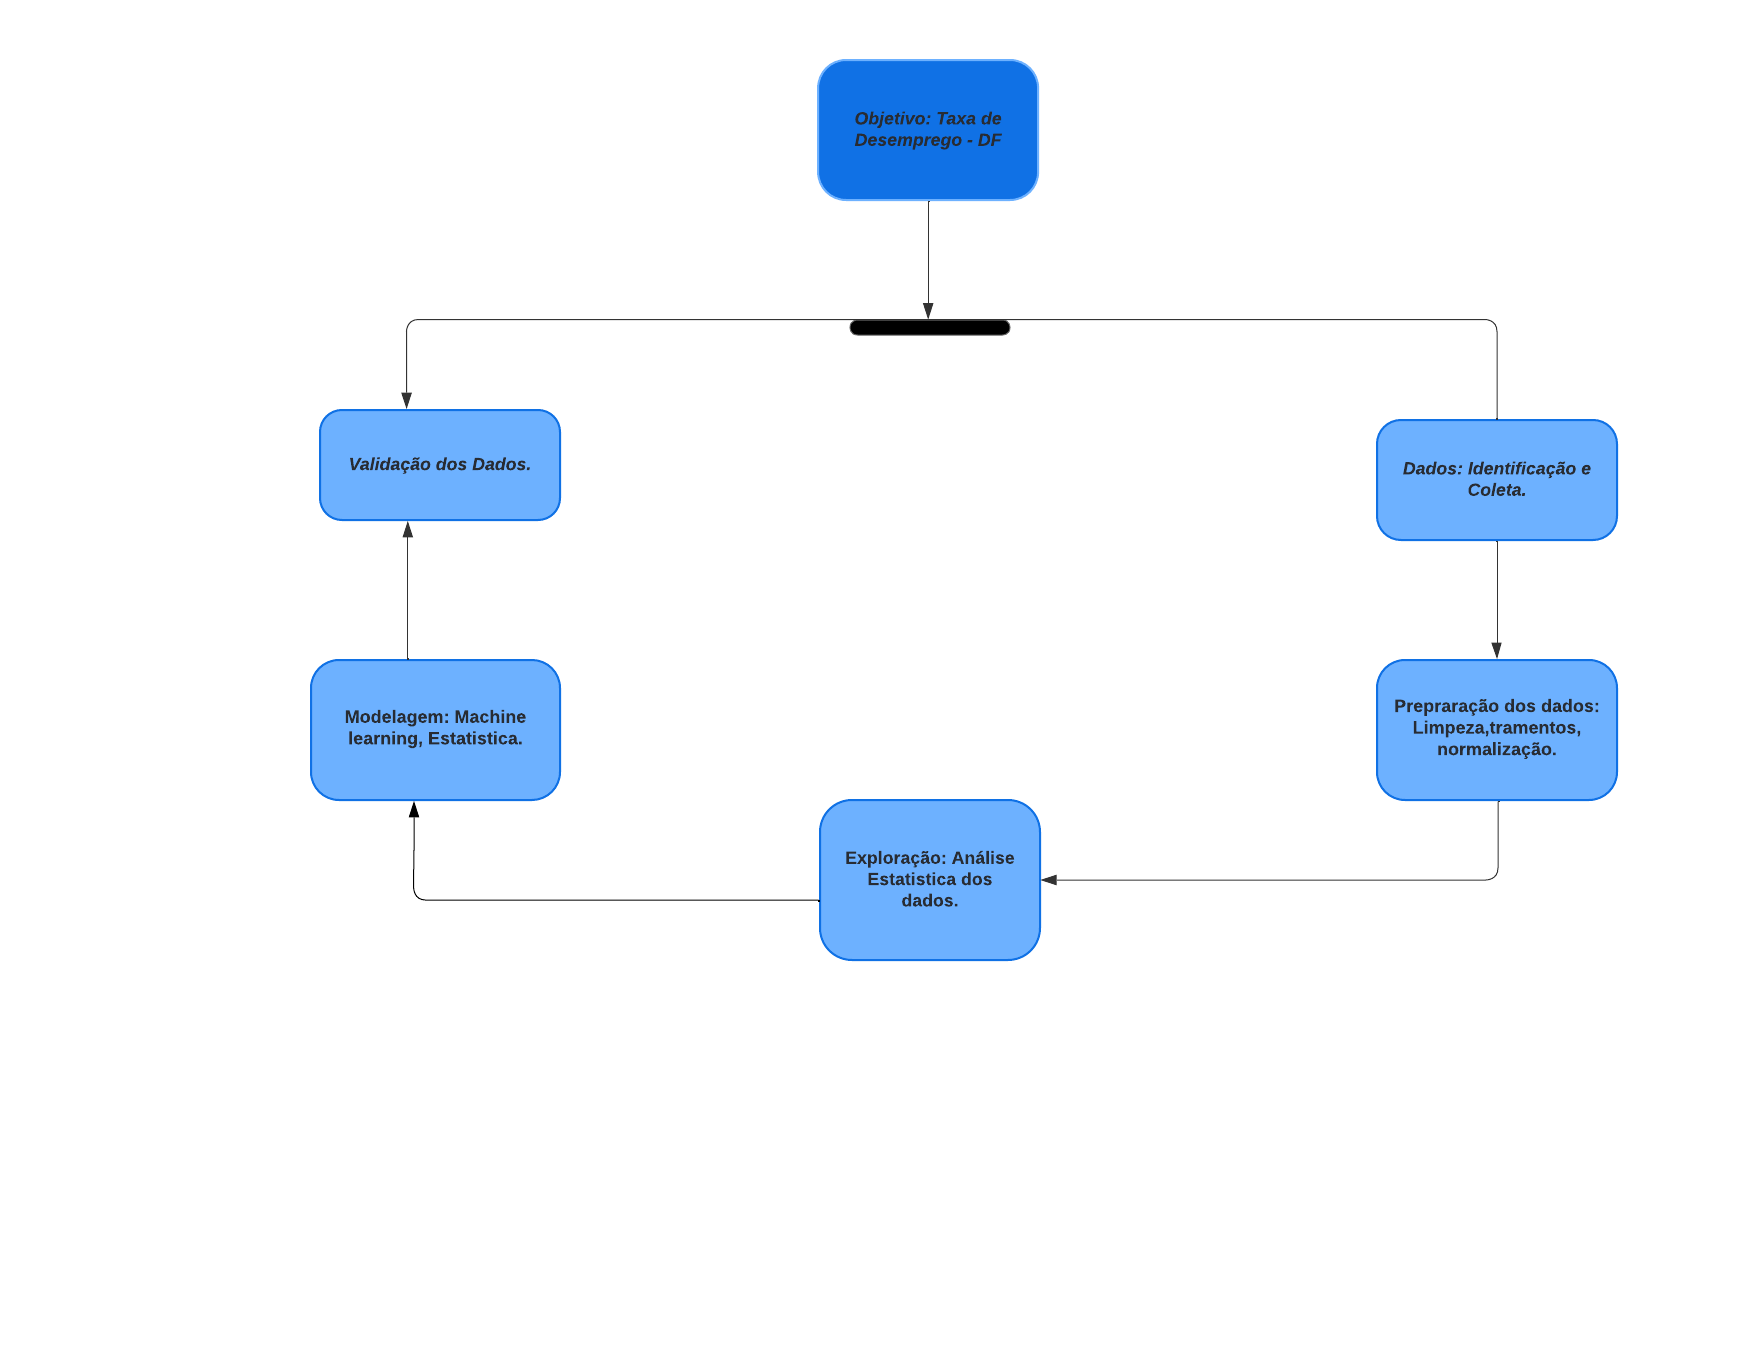

# **Referências**


Oliveira, R.; Albarracin, O. Y.; Silva, G. R. Introdução às Séries Temporais: Uma Abordagem Prática em Python. 2023. Disponível em: https://github.com/Introducao-Series-Temporais-em-Python/Book?tab=readme-ov-file.

Casagrande, D. L.; Oliveira, F. R.; Studart, G.; Silva, I. B. da; Guimarães, P. H. M. Métodos de previsão para a taxa de desemprego mensal: uma análise
de séries temporais. Revista de Economia, Anápolis-GO, v. 12, n. 01, p. 58-86, jan./jun. 2016.

Menezes, L.; Leão, J. C.; Menezes, E. Previsão em séries temporais: uma aplicação para a taxa mensal de desemprego em regiões metropolitanas do Brasil. 2017. Disponível em: https://www.researchgate.net/publication/328052177_Previsao_em_series_temporais_uma_aplicacao_para_a_taxa_mensal_de_desemprego_em_regioes_metropolitanas_do_Brasil

Alharbi, F. R; Csala, D. A Seasonal Autoregressive Integrated Moving Average with Exogenous Factors (SARIMAX) Forecasting Model-Based Time
Series Approach. 2022. Disponível em: https://www.mdpi.com/2411-5134/7/4/94


In [ ]:
#@title **Avaliação**
Relevancia = 10 #@param {type:"slider", min:0, max:10, step:1}

Fonte_dos_dados = 7 #@param {type:"slider", min:0, max:10, step:1}

Metodologia = 7 #@param {type:"slider", min:0, max:10, step:1}

Referencias = 8 #@param {type:"slider", min:0, max:10, step:1}

Apresentacao_geral = 10 #@param {type:"slider", min:0, max:10, step:1}

In [ ]:
#@title **Nota Final**
nota = 0.25*Relevancia + 0.25*Fonte_dos_dados + 0.25*Metodologia + 0.15*Referencias + 0.10*Apresentacao_geral

print(f'Nota final do trabalho {nota :.1f}')

import numpy as np
import pandas as pd

alunos = pd.DataFrame()

lista_nome = []

for i in range(1,4):
  exec("if Aluno" + str(i) + " !='None':  lista = Aluno" + str(i) + ".split(','); lista_nome.append(lista[0]);")

alunos['nome'] = lista_nome
alunos['nota'] = np.round(nota,1)
print()
display(alunos)

Nota final do trabalho 8.1



,nome,nota
0,Isabelli Baptista Villada,8.1
1,Julia Caroline Ribeiro,8.1
2,Lorena Lorrane Fraga dos Santos,8.1
